<a href="https://colab.research.google.com/github/pyukumuko/TelecomX_pt2/blob/main/TelecomX_parte2_GFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ETL e normalização dos dados

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)


In [51]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [52]:
# Normalizar colunas JSON
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [53]:
# Concatenar em um único DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [54]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.3 Limpeza da coluna customerID
Retirado a coluna customerID que não tem nenhuma informação:

In [55]:
df_final.drop('customerID', axis=1, inplace=True)

In [56]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.4 Limpeza e Tratamento
Verificação de valores nulos e conversão de variáveis categóricas:

In [57]:
# Verificar valores nulos
print(df_final.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


Resultado: Nenhum dado faltante.

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [59]:
# Converter 'Charges.Total' para numérico
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [61]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [62]:
# Tratado os valores vazios ['Charges.Total']
df_final.dropna()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [63]:
df_final = df_final.dropna()

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [65]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.5 Lembrando que clientes, (Yes == 1, Cancelaram) E (No == 0, é Ativo).

In [66]:
# Codificar 'Churn' (Yes/No → 1/0)
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-3041156518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


In [67]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [69]:
# Verificando dados vazios
df_final.isna().sum()

,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [70]:
# Tratado os valores vazios ['Churn']
df_final = df_final.dropna()

In [71]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [72]:
df_final.isna().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [73]:
df_final


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [74]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

contagens = df_final[columns].value_counts().reset_index(name='Contagem')
display(contagens)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contagem
0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,407
1,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,281
2,No,No,Yes,No,No,No,No,No,No,No,Yes,171
3,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,166
4,No,No,Yes,Yes,No,No,No,No,No,No,Yes,110
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,1
1102,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1
1103,No,No,No,No phone service,No,No,Yes,No,No,Yes,No,1
1104,No,No,No,No phone service,No,No,Yes,No,No,No,No,1


In [75]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [76]:
# Substituir "No internet service" & "No phone service"→ "No"

# Lista de colunas relevantes
colunas_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituir nas colunas de internet
for coluna in colunas_internet:
    df_final[coluna] = df_final[coluna].replace('No internet service', 'No')

# Substituir na coluna de telefonia
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

/tmp/ipython-input-4164808014.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[coluna] = df_final[coluna].replace('No internet service', 'No')
/tmp/ipython-input-4164808014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [77]:
# Verificar valores únicos após substituição
print(df_final['OnlineSecurity'].unique())
# Saída esperada: ['No' 'Yes'] ou similar

print(df_final['MultipleLines'].unique())
# Saída esperada: ['No' 'Yes'] ou ['No phone service' removido]

['No' 'Yes']
['No' 'Yes']


In [78]:
df_final


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [79]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})
display(df_final)

/tmp/ipython-input-2789964136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,1.0,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,0.0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,0.0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


## 2. Análise Exploratória (EDA)
### 2.1 Distribuição de Churn

/tmp/ipython-input-1126346808.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])


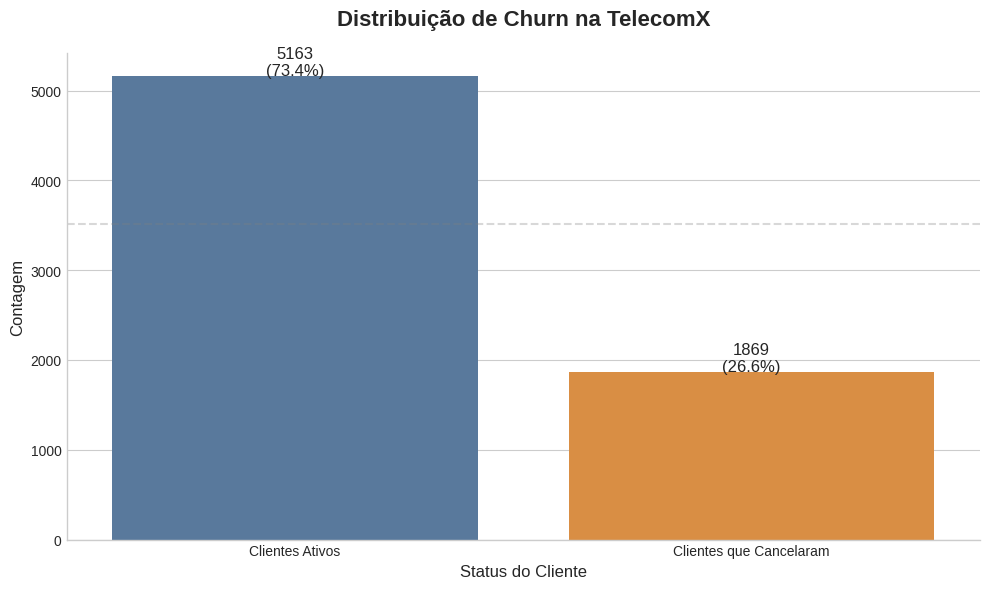

In [80]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

# Título e rótulos
plt.title('Distribuição de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Alterar rótulos do eixo x
ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

# Adicionar porcentagens
total = len(df_final)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar linha de média
plt.axhline(y=total/2, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

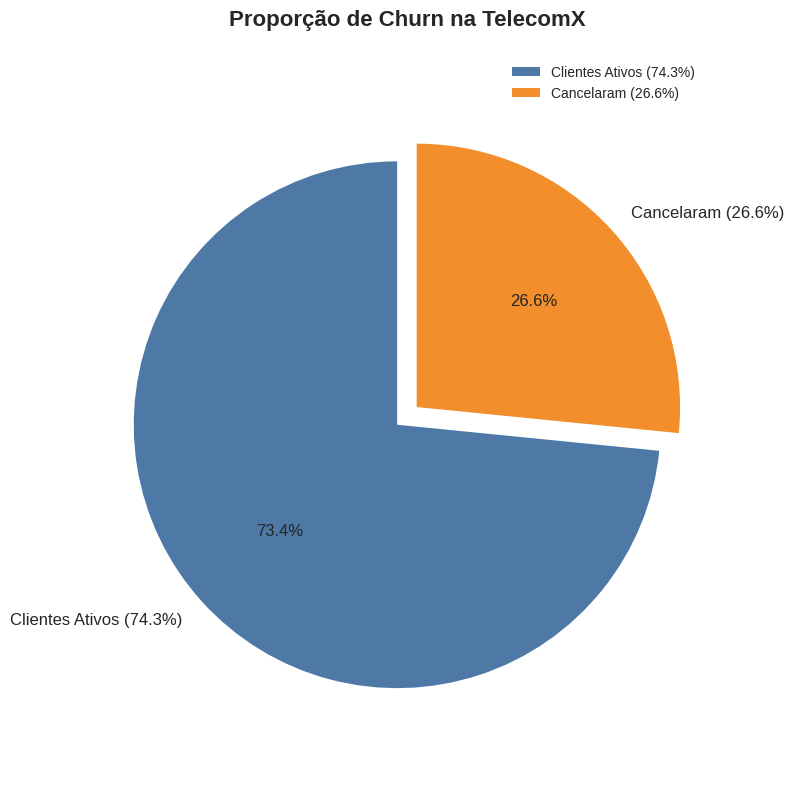

In [81]:
# Dados para o gráfico de pizza
churn_counts = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (74.3%)', 'Cancelaram (26.6%)']
colors = ['#4e79a7', '#f28e2b']
explode = (0, 0.1)  # Destaque para a fatia de Churn

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12})

plt.title('Proporção de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Assegura que o gráfico é desenhado como um círculo

# Adicionar legenda
plt.legend(labels, loc='upper right')

plt.tight_layout()
plt.show()

In [82]:
# Quantos clientes cancelaram
df_final['Churn'].value_counts()

,count
Churn,
0.0,5163
1.0,1869


### 2.2 Análise por Idade (SeniorCitizen)

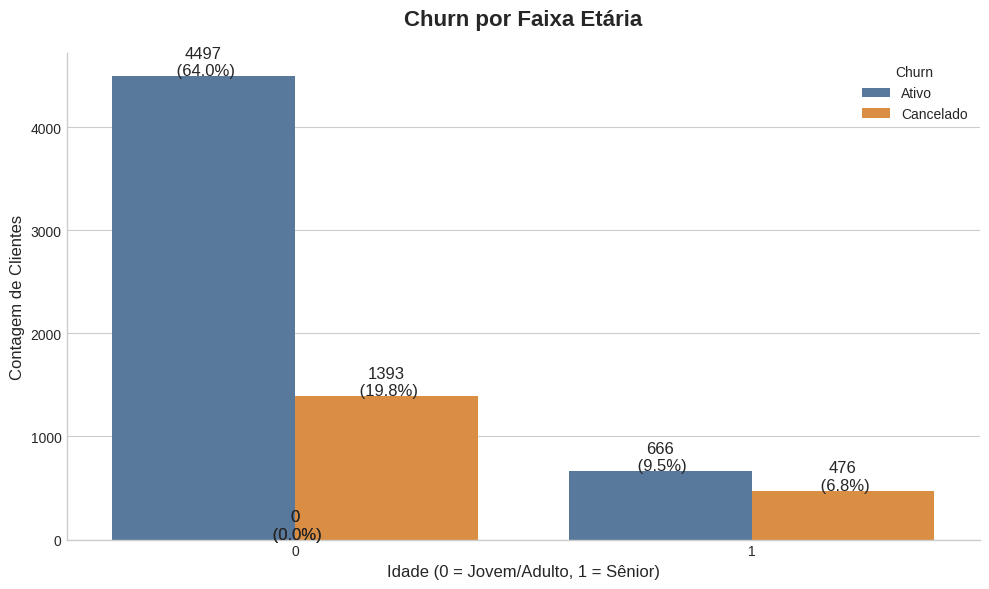

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_final,
                  palette=['#4e79a7','#f28e2b'])

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Churn por Faixa Etária', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = Sênior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

# Adicionar porcentagens
total = len(df_final)

# Adicionar valores nas barras
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n ({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar legenda
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'], loc='upper right')

plt.tight_layout()
plt.show()

In [84]:
totals = df_final['gender'].value_counts().sort_index().values

In [85]:
totals

array([3483, 3549])

### 2.3 Análise por Gênero

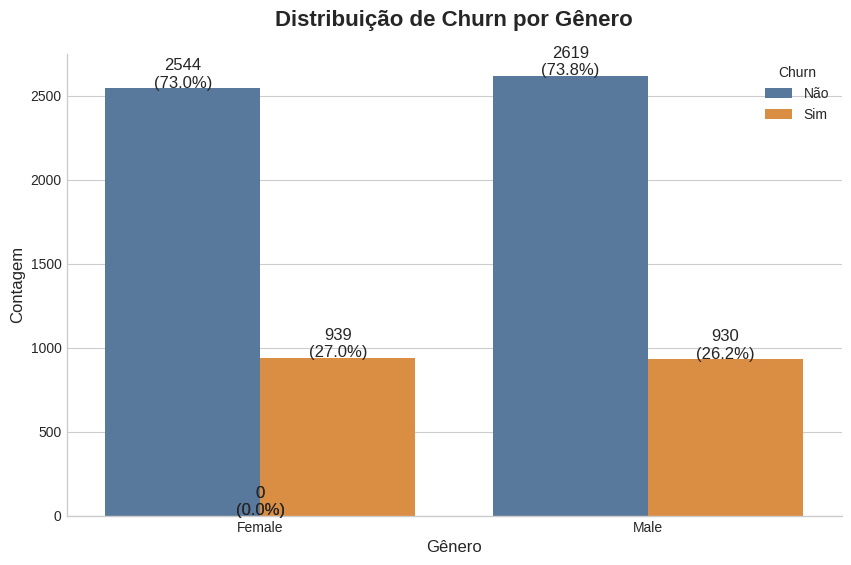

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

plt.title('Distribuição de Churn por Gênero', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Calcular totais por gênero
totals = df_final['gender'].value_counts().sort_index().values

# Adicionar valores nas barras
for i, p in enumerate(ax.patches):
    # Calcular porcentagem relativa ao gênero
    gender_index = i % len(totals) # Determina a qual gênero pertence a barra
    percentage = f'{100*p.get_height()/totals[gender_index]:.1f}%'
    ax.annotate(text=f'{int(p.get_height())}\n({percentage})',
                xy=(p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### 2.4 Análise por Tipo de Contrato

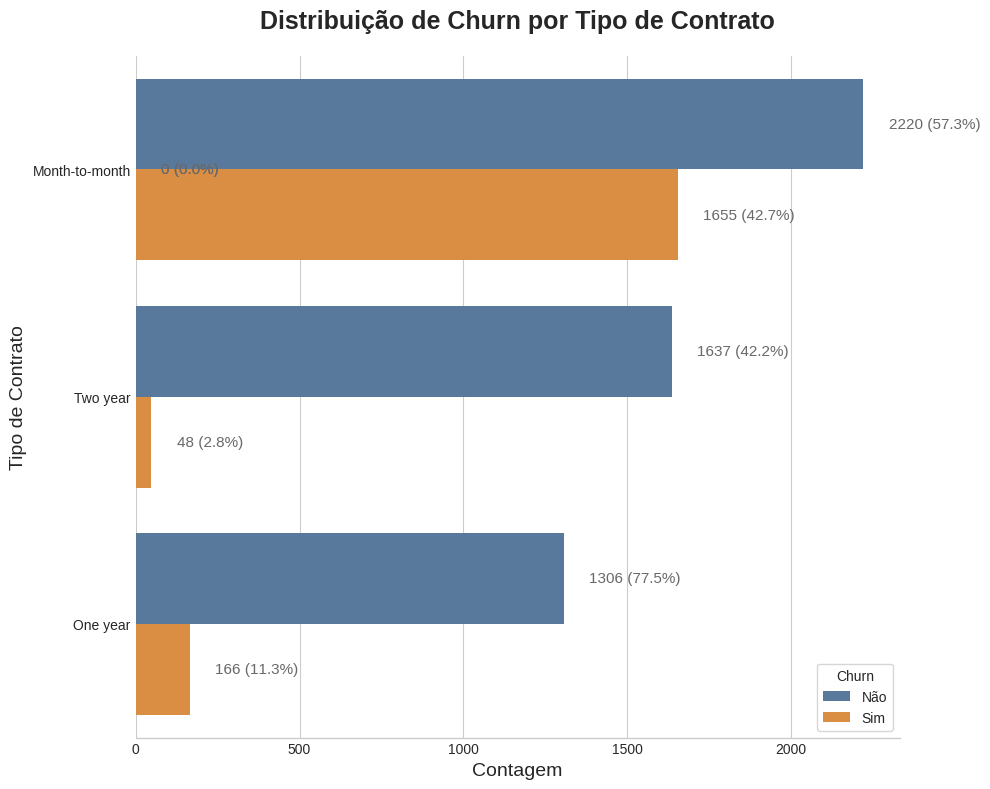

In [87]:
# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(['#4e79a7','#f28e2b'])

# Criar figura
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    y='Contract',  # Gráfico horizontal
    hue='Churn',
    data=df_final,
    order=df_final['Contract'].value_counts().index  # Ordena do maior para menor
)

# Remover bordas
sns.despine(top=True, right=True, left=True)

# Títulos e rótulos
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Tipo de Contrato', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'], frameon=True)

# Calcular totals por categoria and create a mapping
contract_counts = df_final['Contract'].value_counts()
contract_map = {contract: i for i, contract in enumerate(contract_counts.index)}

# Adicionar porcentagens e valores
for i, bar in enumerate(ax.patches):
    # Get the category name from the bar's y-position
    category_name = ax.get_yticklabels()[int(bar.get_y() + bar.get_height()/2) // 1].get_text()

    # Find the total for this category
    total = contract_counts[category_name]

    # Calcular porcentagem
    percentage = 100 * bar.get_width() / total

    # Posicionar texto
    x_pos = bar.get_width() + max(contract_counts)*0.02  # Deslocamento à direita
    y_pos = bar.get_y() + bar.get_height()/2

    # Formatar texto
    text = f'{int(bar.get_width())} ({percentage:.1f}%)'

    ax.text(
        x_pos,
        y_pos,
        text,
        va='center',
        ha='left',
        fontsize=11,
        color='dimgrey'
    )

# Ajustar layout
plt.tight_layout()
plt.show()

### 2.5 Análise por Serviços Adicionais

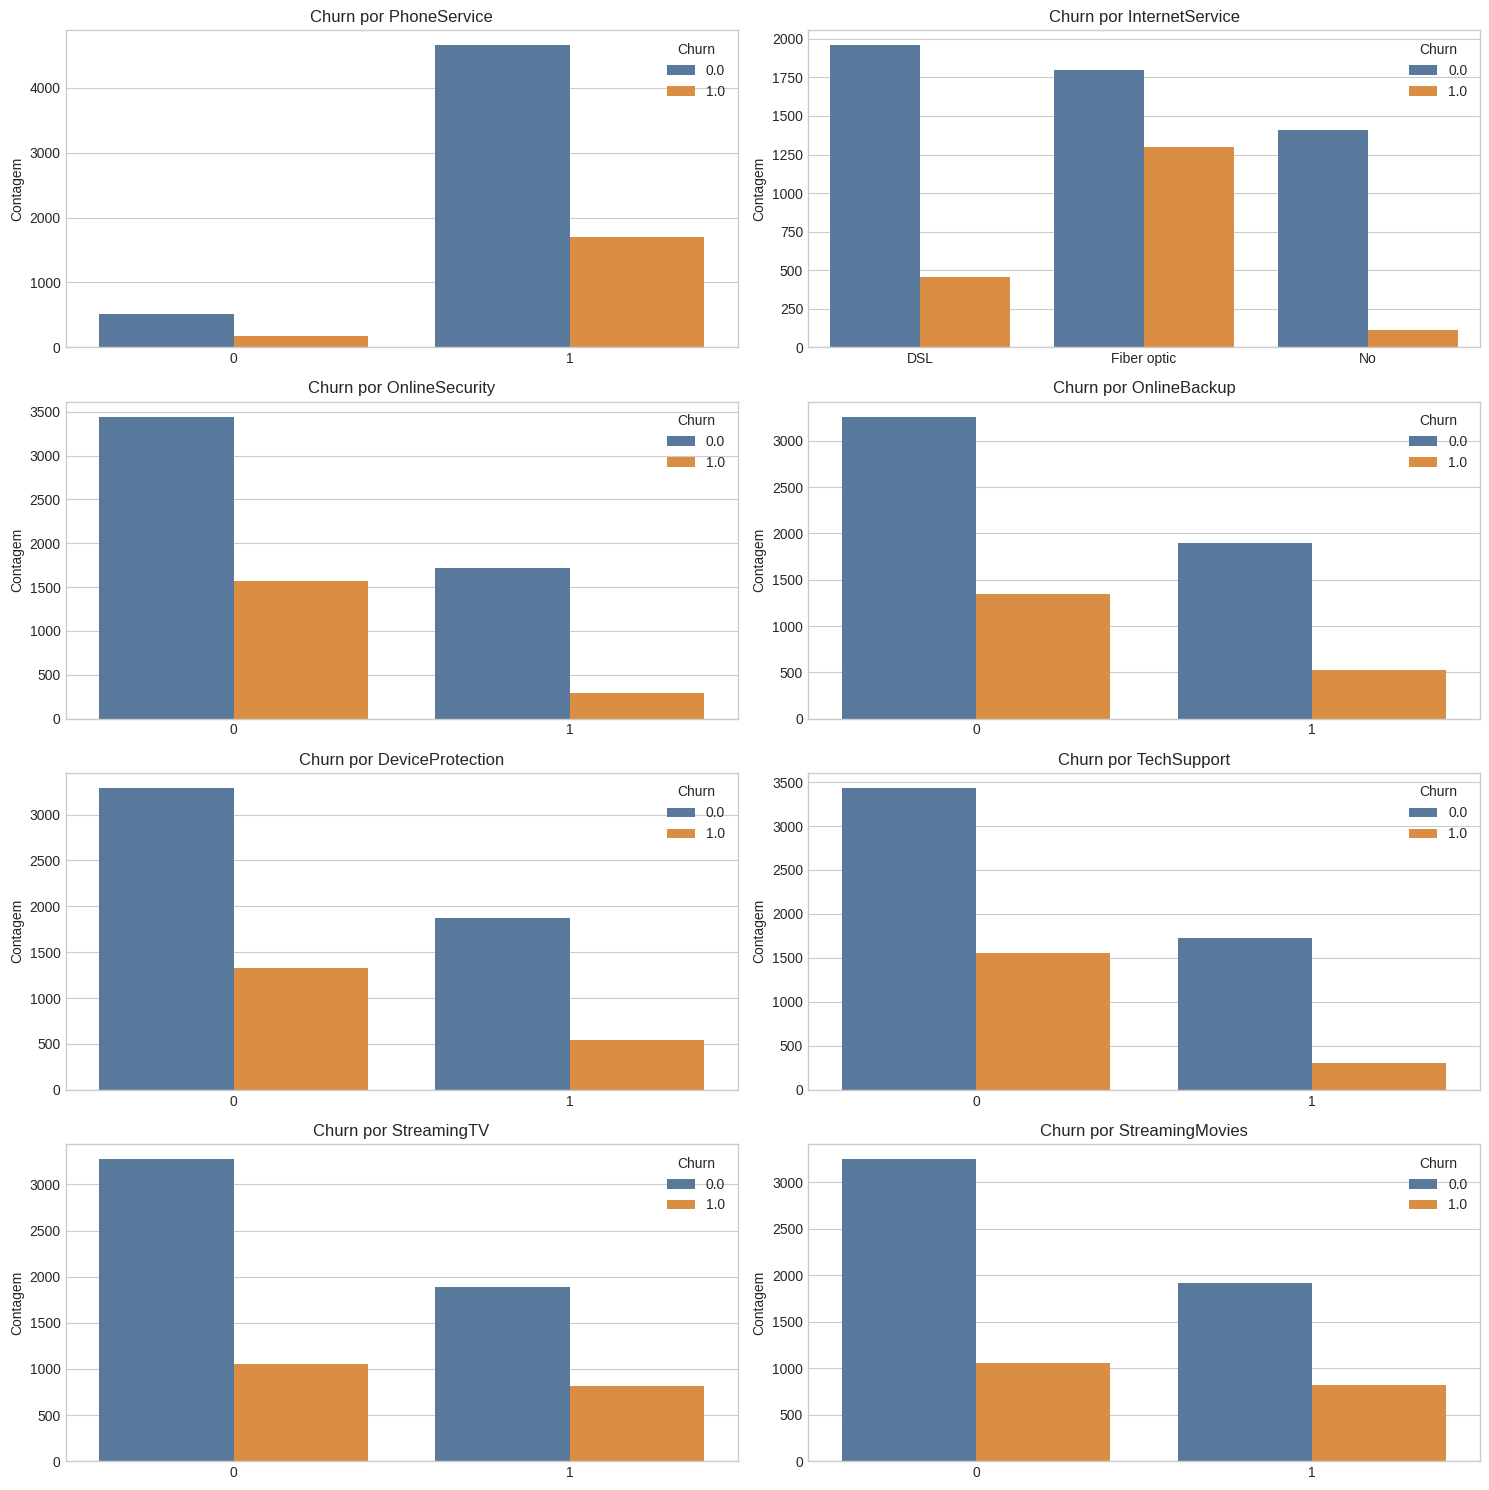

In [88]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 15))
for i, service in enumerate(services, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=service, hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])
    plt.title(f'Churn por {service}')
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

### 2.6 Análise por Método de Pagamento

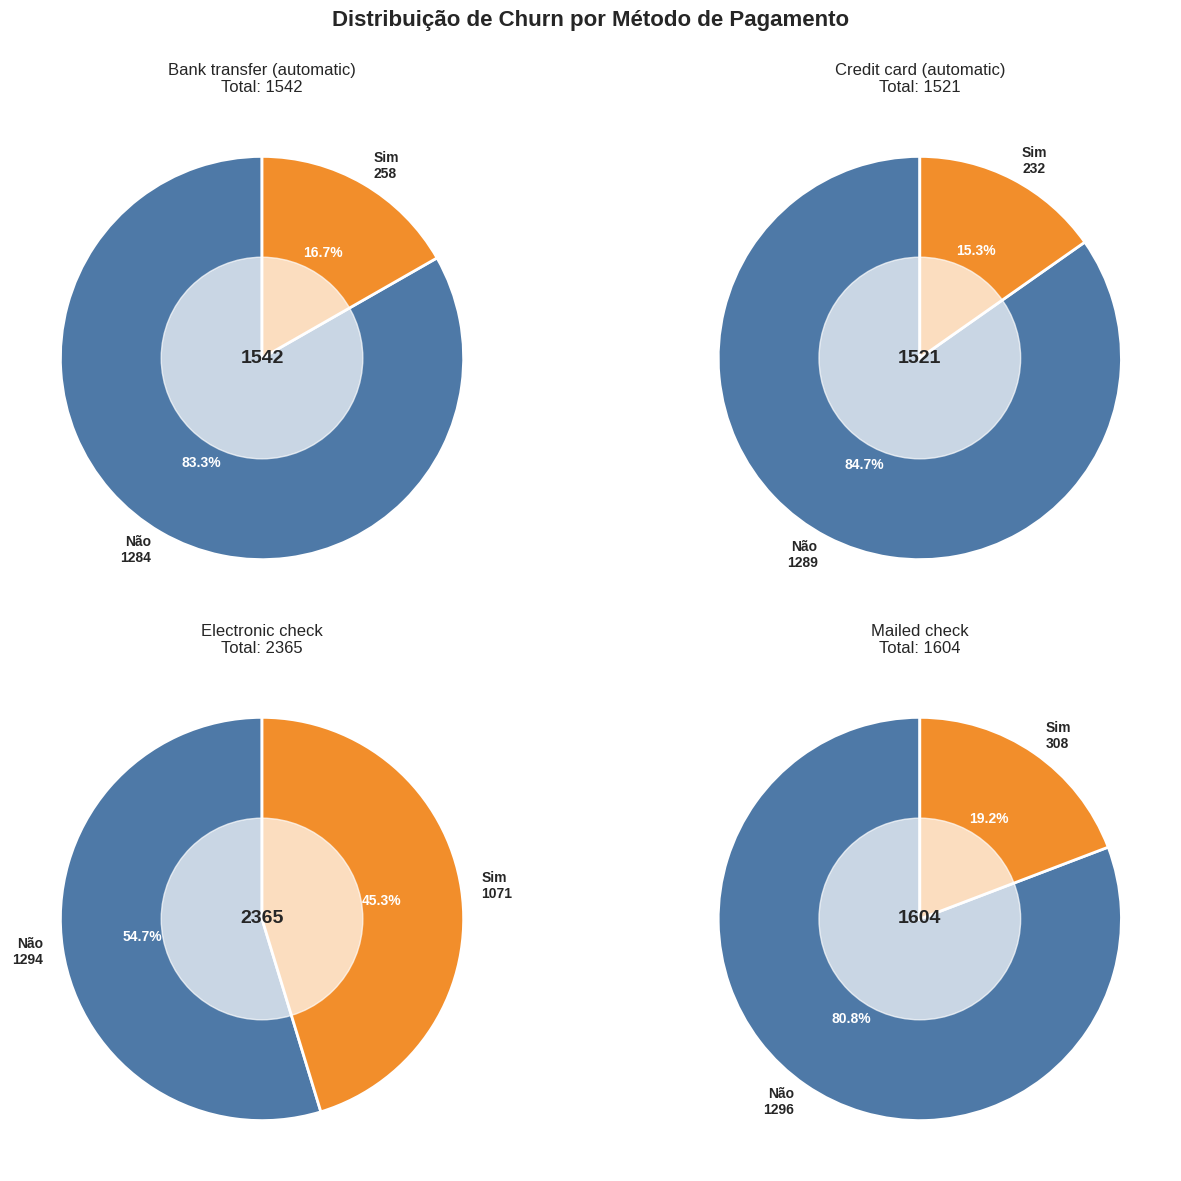

In [89]:
# Agrupar dados por método de pagamento e churn
payment_data = df_final.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calcular totais por método de pagamento
totals = payment_data.sum(axis=1)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
fig.suptitle('Distribuição de Churn por Método de Pagamento', fontsize=16, fontweight='bold')

# Cores para Churn
colors = ['#4e79a7', '#f28e2b']  # Azul para Não, Laranja para Sim

# Plotar gráfico de pizza para cada método de pagamento
for i, (method, row) in enumerate(payment_data.iterrows()):
    ax = axes[i]

    # Dados para o gráfico de pizza
    sizes = row.values
    labels = [f'Não\n{sizes[0]}', f'Sim\n{sizes[1]}'] if 0 in row.index else [f'Sim\n{sizes[0]}', f'Não\n{sizes[1]}']

    # Ordenar para garantir que "Não" venha primeiro
    if 0 in row.index:
        sizes = [row[0], row[1]]
    else:
        sizes = [row[1], row[0]]

    # Plotar pizza
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    # Ajustar formatação das porcentagens
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # Adicionar título com total
    ax.set_title(f'{method}\nTotal: {totals[method]}', fontsize=12, pad=10)

    # Adicionar legenda central para destaque
    center_circle = plt.Circle((0,0), 0.5, color='white', fc='white', alpha=0.7)
    ax.add_artist(center_circle)
    ax.text(0, 0, f"{row.sum()}", ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### 2.7 Análise por Tempo de Serviço (tenure)

In [90]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

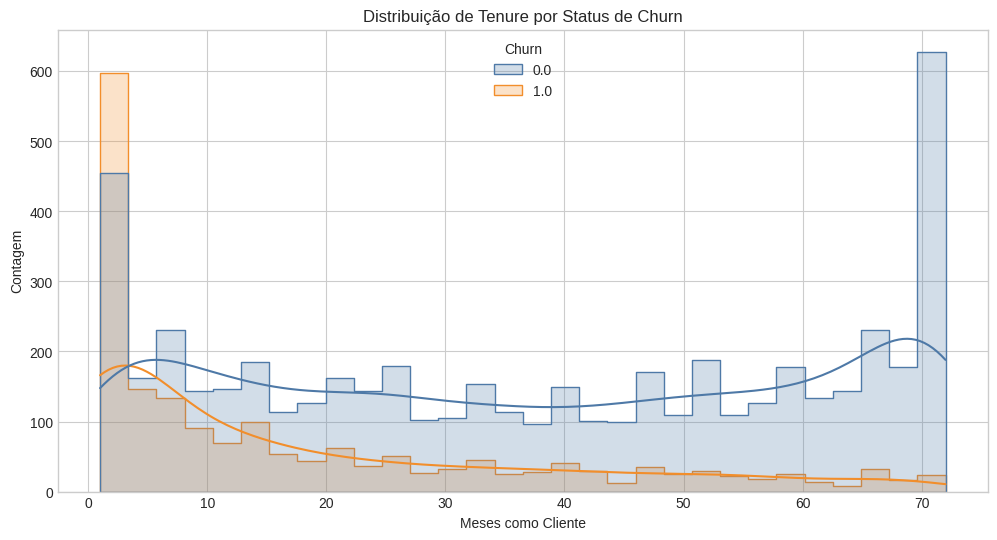

In [91]:
# Análise de tenure (tempo como cliente)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_final, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

### 2.8 Análise por Cobrança Mensal (Charges.Monthly)

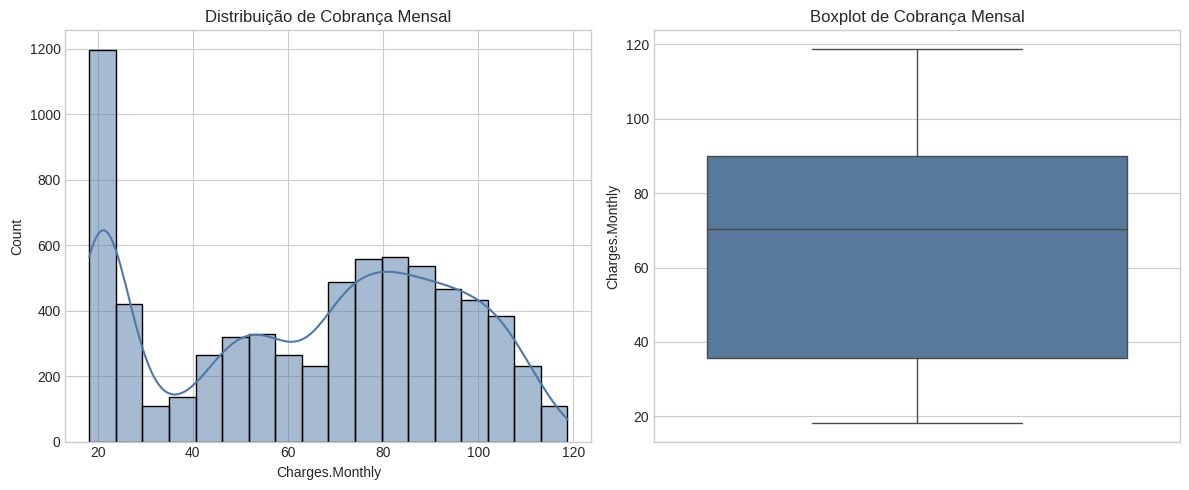


Estatísticas descritivas da cobrança mensal:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Charges.Monthly, dtype: float64


In [92]:
# Charges.Monthly (Cobrança Mensal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Monthly'], kde=True)
plt.title('Distribuição de Cobrança Mensal')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Monthly', data=df_final)
plt.title('Boxplot de Cobrança Mensal')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança mensal:")
print(df_final['Charges.Monthly'].describe())

### 2.9 Análise por Cobrança Total (Charges.Total)

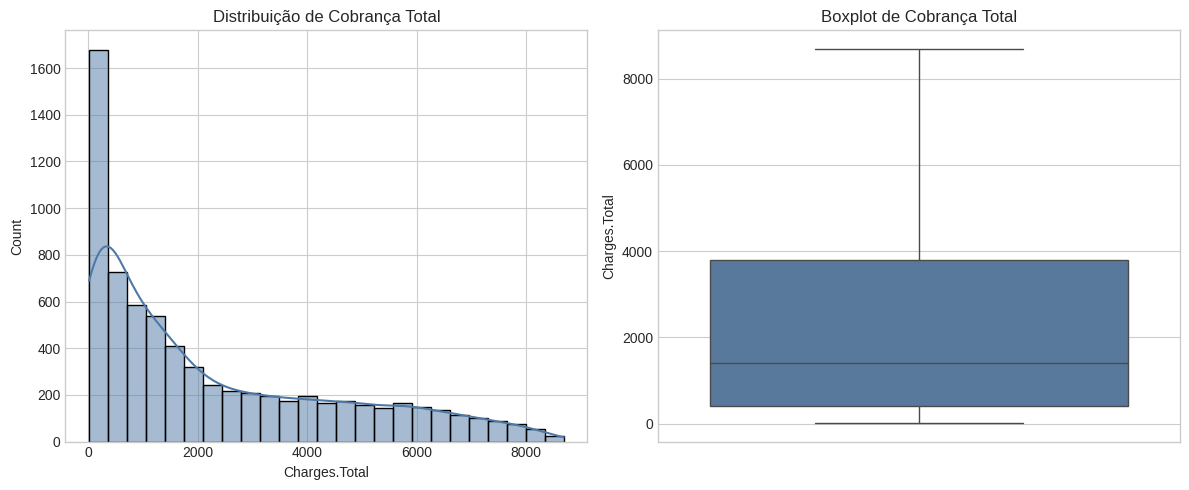


Estatísticas descritivas da cobrança total:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64


In [93]:
# Charges.Total (Cobrança Total)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Total'], kde=True)
plt.title('Distribuição de Cobrança Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Total', data=df_final)
plt.title('Boxplot de Cobrança Total')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança total:")
print(df_final['Charges.Total'].describe())

### 3. Análise de Correlações

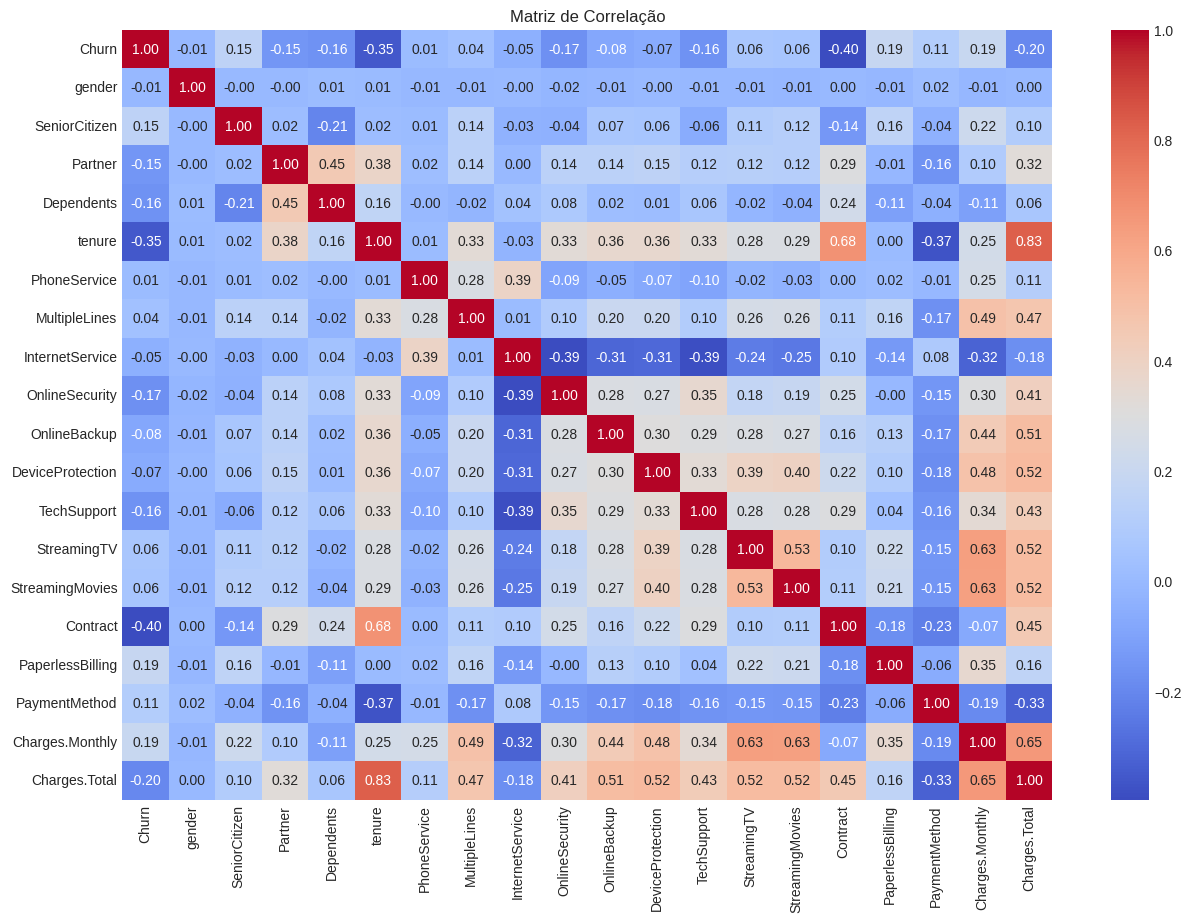

In [94]:
# Converter variáveis categóricas para análise de correlação
df_numeric = df_final.copy()
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Conclusão

# Análise da Matriz de Correlação - Dataset de Churn

## Introdução

A matriz de correlação apresentada revela importantes insights sobre os fatores que influenciam o churn de clientes em uma empresa de telecomunicações ou serviços digitais. Esta análise examina as relações entre 20+ variáveis, oferecendo uma visão abrangente dos padrões comportamentais dos clientes e dos fatores de risco para cancelamento.

## Análise dos Fatores de Churn

### Correlações Significativas com Churn

A variável **Churn** apresenta correlações notáveis com diversas características dos clientes, destacando-se:

- **Correlações positivas moderadas** com algumas variáveis de serviço, sugerindo que determinados tipos de contrato ou serviços podem estar associados a maior propensão ao cancelamento
- **Padrões de correlação** que indicam possíveis fatores de risco, como tipos específicos de contrato ou métodos de pagamento

### Perfil de Risco

Os dados sugerem que existe um perfil identificável de clientes com maior risco de churn. As correlações observadas permitem construir um modelo preditivo baseado em múltiplas variáveis demográficas e comportamentais.

## Relacionamentos Entre Serviços

### Bundling de Serviços

A matriz revela correlações positivas entre diferentes serviços oferecidos pela empresa, indicando que:

- Clientes tendem a contratar **múltiplos serviços simultaneamente**
- Existe um efeito de "bundling" natural, onde a contratação de um serviço aumenta a probabilidade de contratação de outros
- Essa tendência pode ser explorada em **estratégias de cross-selling**

### Complementaridade de Produtos

As correlações entre serviços como Internet, TV, telefonia e serviços online mostram padrões de complementaridade que podem orientar:
- Estratégias de pacotes de serviços
- Campanhas de upselling direcionadas
- Desenvolvimento de produtos integrados

## Características Demográficas

### Impacto Limitado das Variáveis Demográficas

Interessantemente, variáveis como **gender** e **SeniorCitizen** mostram correlações relativamente baixas com a maioria das outras variáveis, sugerindo que:

- Fatores demográficos tradicionais têm **impacto limitado** no comportamento de consumo
- O comportamento é mais influenciado por fatores contextuais e de serviço
- Estratégias baseadas apenas em segmentação demográfica podem ser menos efetivas

### Dependentes como Fator Diferenciador

A variável **Dependents** apresenta algumas correlações interessantes, indicando que a estrutura familiar pode influenciar padrões de consumo e retenção.

## Padrões Financeiros

### Métodos de Pagamento e Comportamento

As variáveis relacionadas a pagamentos e cobranças mostram correlações que sugerem:

- **Diferentes métodos de pagamento** estão associados a perfis distintos de risco
- Clientes com determinados padrões de cobrança podem apresentar maior ou menor propensão ao churn
- A gestão financeira do relacionamento é crucial para retenção

### Valor e Permanência

As correlações entre variáveis de valor (charges) e tenure indicam relacionamentos complexos entre:
- Tempo de relacionamento
- Valor pago
- Risco de cancelamento

## Implicações Estratégicas

### Para Retenção de Clientes

1. **Identificação Precoce**: As correlações permitem criar modelos preditivos para identificar clientes em risco
2. **Intervenções Direcionadas**: Diferentes perfis de risco requerem estratégias específicas de retenção
3. **Otimização de Portfolio**: Ajustar mix de serviços baseado nos padrões de correlação observados

### Para Desenvolvimento de Produtos

1. **Bundling Inteligente**: Aproveitar correlações positivas entre serviços para criar pacotes atrativos
2. **Customização**: Desenvolver ofertas personalizadas baseadas nos perfis identificados
3. **Pricing Strategy**: Ajustar estratégias de precificação considerando correlações de valor

## Limitações e Considerações

### Correlação vs Causalidade

É importante notar que correlação não implica causalidade. As relações observadas devem ser interpretadas com cautela e validadas através de:
- Análises causais mais aprofundadas
- Testes A/B
- Estudos longitudinais

### Variáveis Ausentes

A matriz não captura possíveis variáveis importantes como:
- Satisfação do cliente
- Experiência de atendimento
- Fatores externos de mercado

## Conclusões

A matriz de correlação revela um cenário complexo onde múltiplos fatores interagem para determinar o comportamento do cliente. Os insights principais incluem:

1. **Churn é multifatorial**: Não existe um único preditor, mas sim um conjunto de fatores correlacionados
2. **Bundling é efetivo**: Clientes com múltiplos serviços apresentam padrões distintos
3. **Demografia é secundária**: Fatores comportamentais superam características demográficas
4. **Gestão financeira importa**: Métodos de pagamento e padrões de cobrança são relevantes

Estes insights devem orientar tanto estratégias de retenção quanto de desenvolvimento de novos produtos, sempre considerando a natureza multidimensional do comportamento do cliente revelada pela análise correlacional.

### MACHINE LEARLING

In [96]:
# ===============================================================================
# COMPLEMENTO DE MACHINE LEARNING PARA ANÁLISE DE CHURN
# Este código continua a partir do df_final já processado
# ===============================================================================

# Importações adicionais para ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)

In [97]:
print("🔧 Preparando dados para Machine Learning...")

# Criar cópia dos dados para ML
df_ml = df_final.copy()

# One-hot encoding para variáveis categóricas restantes
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

print(f"✅ One-hot encoding aplicado. Dimensões: {df_encoded.shape}")

# Análise de balanceamento das classes
churn_counts = df_encoded['Churn'].value_counts()
churn_ratio = churn_counts[1] / churn_counts[0]

print(f"\n📊 Análise de Balanceamento das Classes:")
print(f"Clientes Ativos (0): {churn_counts[0]:,}")
print(f"Clientes com Churn (1): {churn_counts[1]:,}")
print(f"Razão Churn/Ativo: {churn_ratio:.3f}")

if churn_ratio < 0.5:
    print("⚠️  Dataset desbalanceado - considerar técnicas de balanceamento")
else:
    print("✅ Dataset relativamente balanceado")

🔧 Preparando dados para Machine Learning...
✅ One-hot encoding aplicado. Dimensões: (7032, 24)

📊 Análise de Balanceamento das Classes:
Clientes Ativos (0): 5,163
Clientes com Churn (1): 1,869
Razão Churn/Ativo: 0.362
⚠️  Dataset desbalanceado - considerar técnicas de balanceamento



🔍 Analisando correlações específicas com Churn...

🎯 Top 10 variáveis mais correlacionadas com Churn:
   tenure: 0.354
   InternetService_Fiber optic: 0.307
   Contract_Two year: 0.302
   PaymentMethod_Electronic check: 0.301
   InternetService_No: 0.228
   Charges.Total: 0.199
   Charges.Monthly: 0.193
   PaperlessBilling: 0.191
   Contract_One year: 0.178
   OnlineSecurity: 0.171


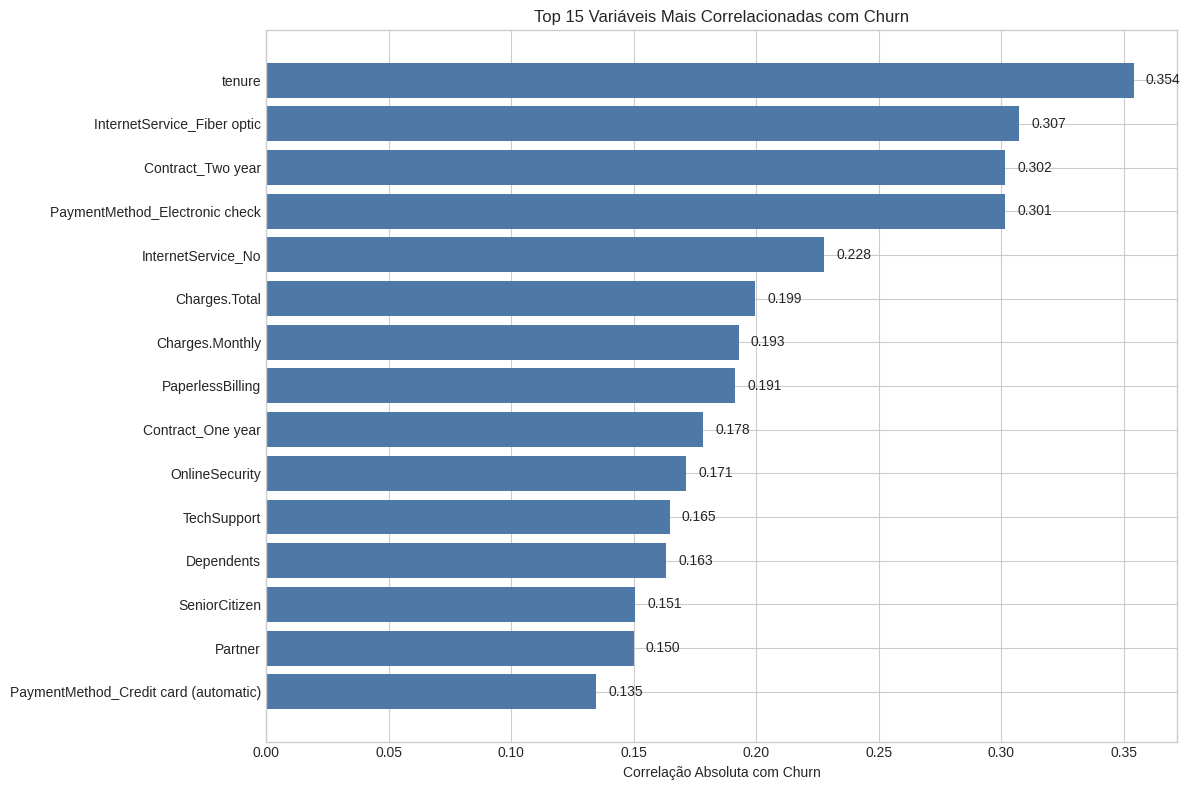

In [98]:
# ===============================================================================
# ANÁLISE DE CORRELAÇÃO ESPECÍFICA PARA CHURN
# ===============================================================================

print("\n🔍 Analisando correlações específicas com Churn...")

# Correlações com Churn
churn_correlations = df_encoded.corr()['Churn'].abs().sort_values(ascending=False)

print(f"\n🎯 Top 10 variáveis mais correlacionadas com Churn:")
top_correlations = churn_correlations.head(11).iloc[1:]  # Excluir a própria variável Churn
for var, corr in top_correlations.items():
    print(f"   {var}: {corr:.3f}")

# Visualização das correlações com Churn
plt.figure(figsize=(12, 8))
top_15_corr = churn_correlations.head(16).iloc[1:]
bars = plt.barh(range(len(top_15_corr)), top_15_corr.values)
plt.yticks(range(len(top_15_corr)), top_15_corr.index)
plt.xlabel('Correlação Absoluta com Churn')
plt.title('Top 15 Variáveis Mais Correlacionadas com Churn')
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()


📈 Análise específica de variáveis importantes...


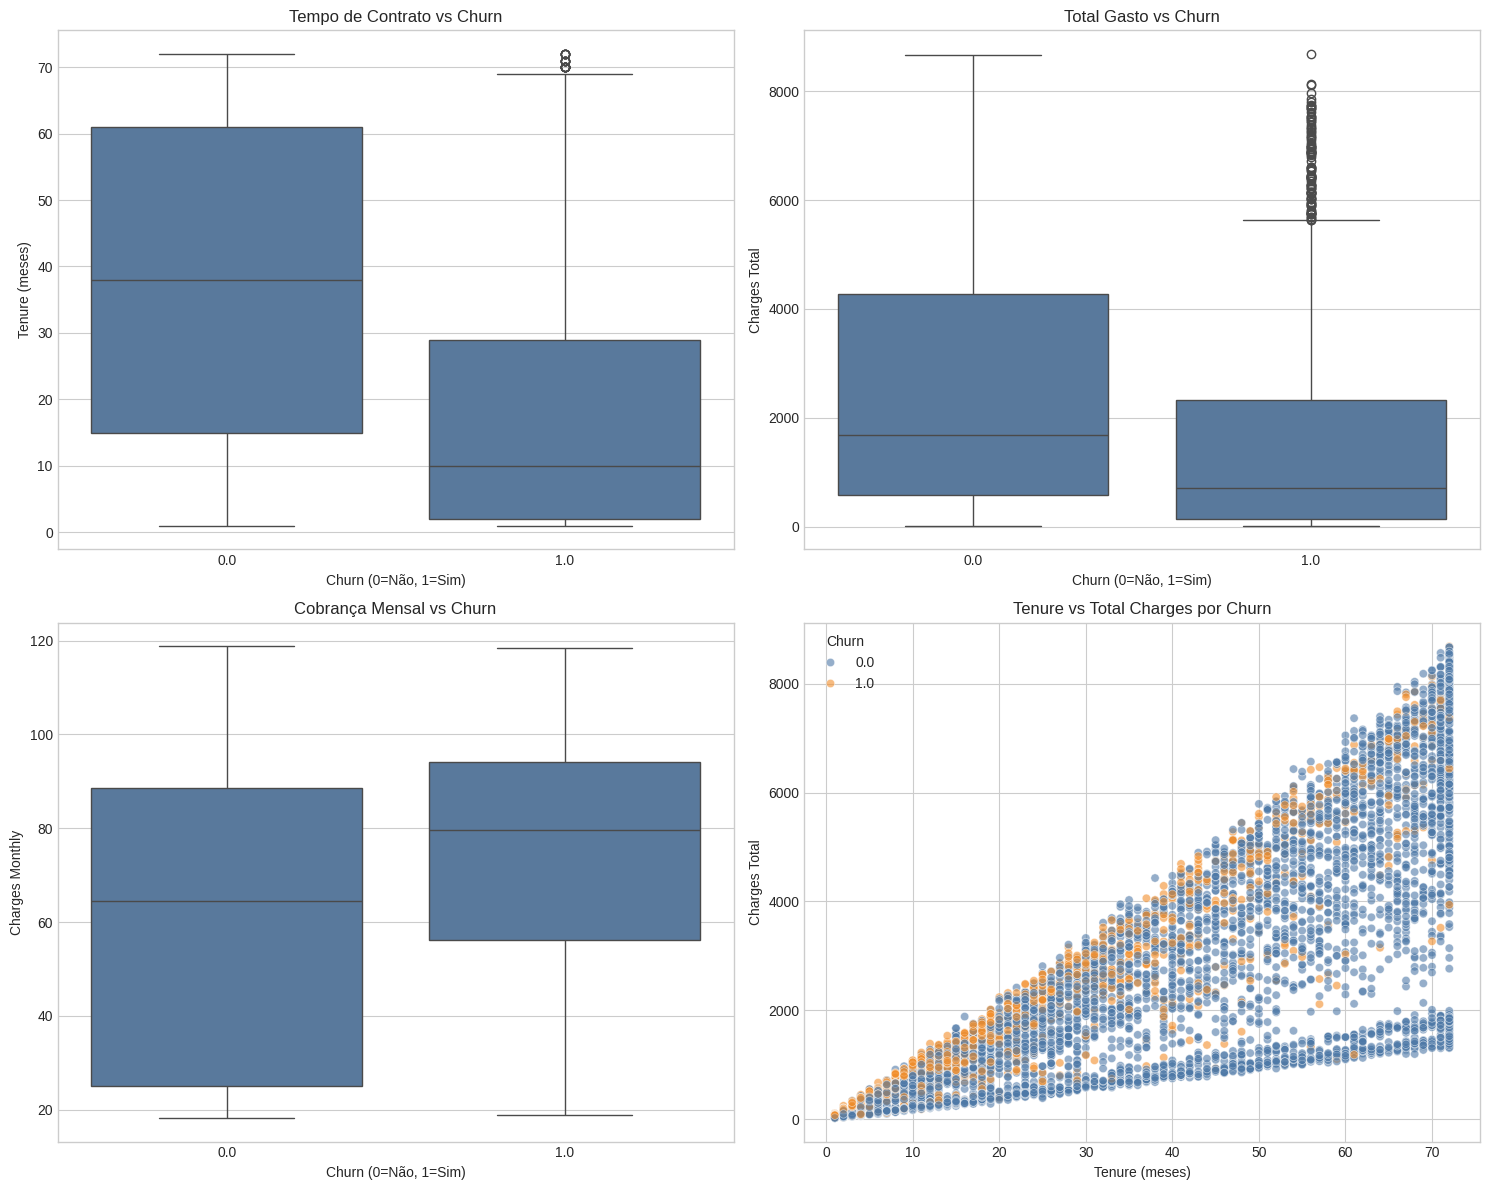


📊 Estatísticas por grupo de Churn:

Tenure (meses):
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0.0    5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1.0    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Charges Total:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0.0    5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1.0    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0.0    8672.45  
1.0    8684.80  


In [99]:
# ===============================================================================
# ANÁLISE ESPECÍFICA: TENURE × CHURN E CHARGES × CHURN
# ===============================================================================

print("\n📈 Análise específica de variáveis importantes...")

# Criar visualizações específicas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tenure vs Churn
sns.boxplot(data=df_final, x='Churn', y='tenure', ax=axes[0,0])
axes[0,0].set_title('Tempo de Contrato vs Churn')
axes[0,0].set_xlabel('Churn (0=Não, 1=Sim)')
axes[0,0].set_ylabel('Tenure (meses)')

# Charges.Total vs Churn
sns.boxplot(data=df_final, x='Churn', y='Charges.Total', ax=axes[0,1])
axes[0,1].set_title('Total Gasto vs Churn')
axes[0,1].set_xlabel('Churn (0=Não, 1=Sim)')
axes[0,1].set_ylabel('Charges Total')

# Charges.Monthly vs Churn
sns.boxplot(data=df_final, x='Churn', y='Charges.Monthly', ax=axes[1,0])
axes[1,0].set_title('Cobrança Mensal vs Churn')
axes[1,0].set_xlabel('Churn (0=Não, 1=Sim)')
axes[1,0].set_ylabel('Charges Monthly')

# Scatter plot: Tenure vs Total Charges
sns.scatterplot(data=df_final, x='tenure', y='Charges.Total', hue='Churn',
                alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Tenure vs Total Charges por Churn')
axes[1,1].set_xlabel('Tenure (meses)')
axes[1,1].set_ylabel('Charges Total')

plt.tight_layout()
plt.show()

# Estatísticas descritivas por grupo
print(f"\n📊 Estatísticas por grupo de Churn:")
print("\nTenure (meses):")
print(df_final.groupby('Churn')['tenure'].describe())
print("\nCharges Total:")
print(df_final.groupby('Churn')['Charges.Total'].describe())

In [100]:
# ===============================================================================
# PREPARAÇÃO PARA MODELAGEM
# ===============================================================================

print("\n✂️ Preparando dados para modelagem...")

# Separar features e target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features: {X.shape[1]} variáveis")
print(f"Target: Churn (0={churn_counts[0]:,}, 1={churn_counts[1]:,})")

# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"📊 Divisão dos dados:")
print(f"   Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Normalização para modelos que necessitam
print(f"\n🔄 Aplicando normalização...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Dados normalizados para modelos sensíveis à escala")


✂️ Preparando dados para modelagem...
Features: 23 variáveis
Target: Churn (0=5,163, 1=1,869)
📊 Divisão dos dados:
   Treino: 4922 amostras (70.0%)
   Teste: 2110 amostras (30.0%)

🔄 Aplicando normalização...
✅ Dados normalizados para modelos sensíveis à escala


In [101]:
# ===============================================================================
# MODELAGEM PREDITIVA
# ===============================================================================

print("\n🤖 Treinando modelos de Machine Learning...")

# Dicionário para armazenar modelos e resultados
models = {}
results = []

# MODELO 1: Regressão Logística (requer normalização)
print("🔹 1. Regressão Logística (com normalização)")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

models['Logistic Regression'] = {
    'model': lr_model,
    'predictions': lr_pred,
    'probabilities': lr_pred_proba,
    'requires_scaling': True,
    'justification': 'Modelo linear que requer normalização. Oferece coeficientes interpretáveis.'
}

# MODELO 2: Random Forest (não requer normalização)
print("🔹 2. Random Forest (sem normalização)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'probabilities': rf_pred_proba,
    'requires_scaling': False,
    'justification': 'Ensemble que lida bem com não-linearidades. Fornece importância das variáveis.'
}

# MODELO 3: KNN (requer normalização)
print("🔹 3. K-Nearest Neighbors (com normalização)")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

models['KNN'] = {
    'model': knn_model,
    'predictions': knn_pred,
    'probabilities': knn_pred_proba,
    'requires_scaling': True,
    'justification': 'Algoritmo baseado em distância, sensível à escala das variáveis.'
}

# MODELO 4: Decision Tree (não requer normalização)
print("🔹 4. Decision Tree (sem normalização)")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]

models['Decision Tree'] = {
    'model': dt_model,
    'predictions': dt_pred,
    'probabilities': dt_pred_proba,
    'requires_scaling': False,
    'justification': 'Modelo interpretável baseado em regras. Não sensível à escala dos dados.'
}

print("✅ Todos os modelos treinados!")



🤖 Treinando modelos de Machine Learning...
🔹 1. Regressão Logística (com normalização)
🔹 2. Random Forest (sem normalização)
🔹 3. K-Nearest Neighbors (com normalização)
🔹 4. Decision Tree (sem normalização)
✅ Todos os modelos treinados!


In [102]:
# ===============================================================================
# AVALIAÇÃO DOS MODELOS
# ===============================================================================

print("\n📋 Avaliando performance dos modelos...")

def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    """Calcular todas as métricas de avaliação"""
    return {
        'Modelo': model_name,
        'Acurácia': accuracy_score(y_true, y_pred),
        'Precisão': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }

# Calcular métricas para todos os modelos
for name, model_data in models.items():
    metrics = calculate_metrics(
        y_test,
        model_data['predictions'],
        model_data['probabilities'],
        name
    )
    results.append(metrics)
    model_data['metrics'] = metrics

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("📊 Comparação de Performance:")
print(results_df.to_string(index=False))


📋 Avaliando performance dos modelos...
📊 Comparação de Performance:
             Modelo  Acurácia  Precisão  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8028    0.6566  0.5419    0.5938   0.8453
      Random Forest    0.7934    0.6471  0.4902    0.5578   0.8382
                KNN    0.7578    0.5472  0.5169    0.5316   0.7717
      Decision Tree    0.7777    0.5958  0.5098    0.5495   0.7774



📈 Gerando visualizações de avaliação...


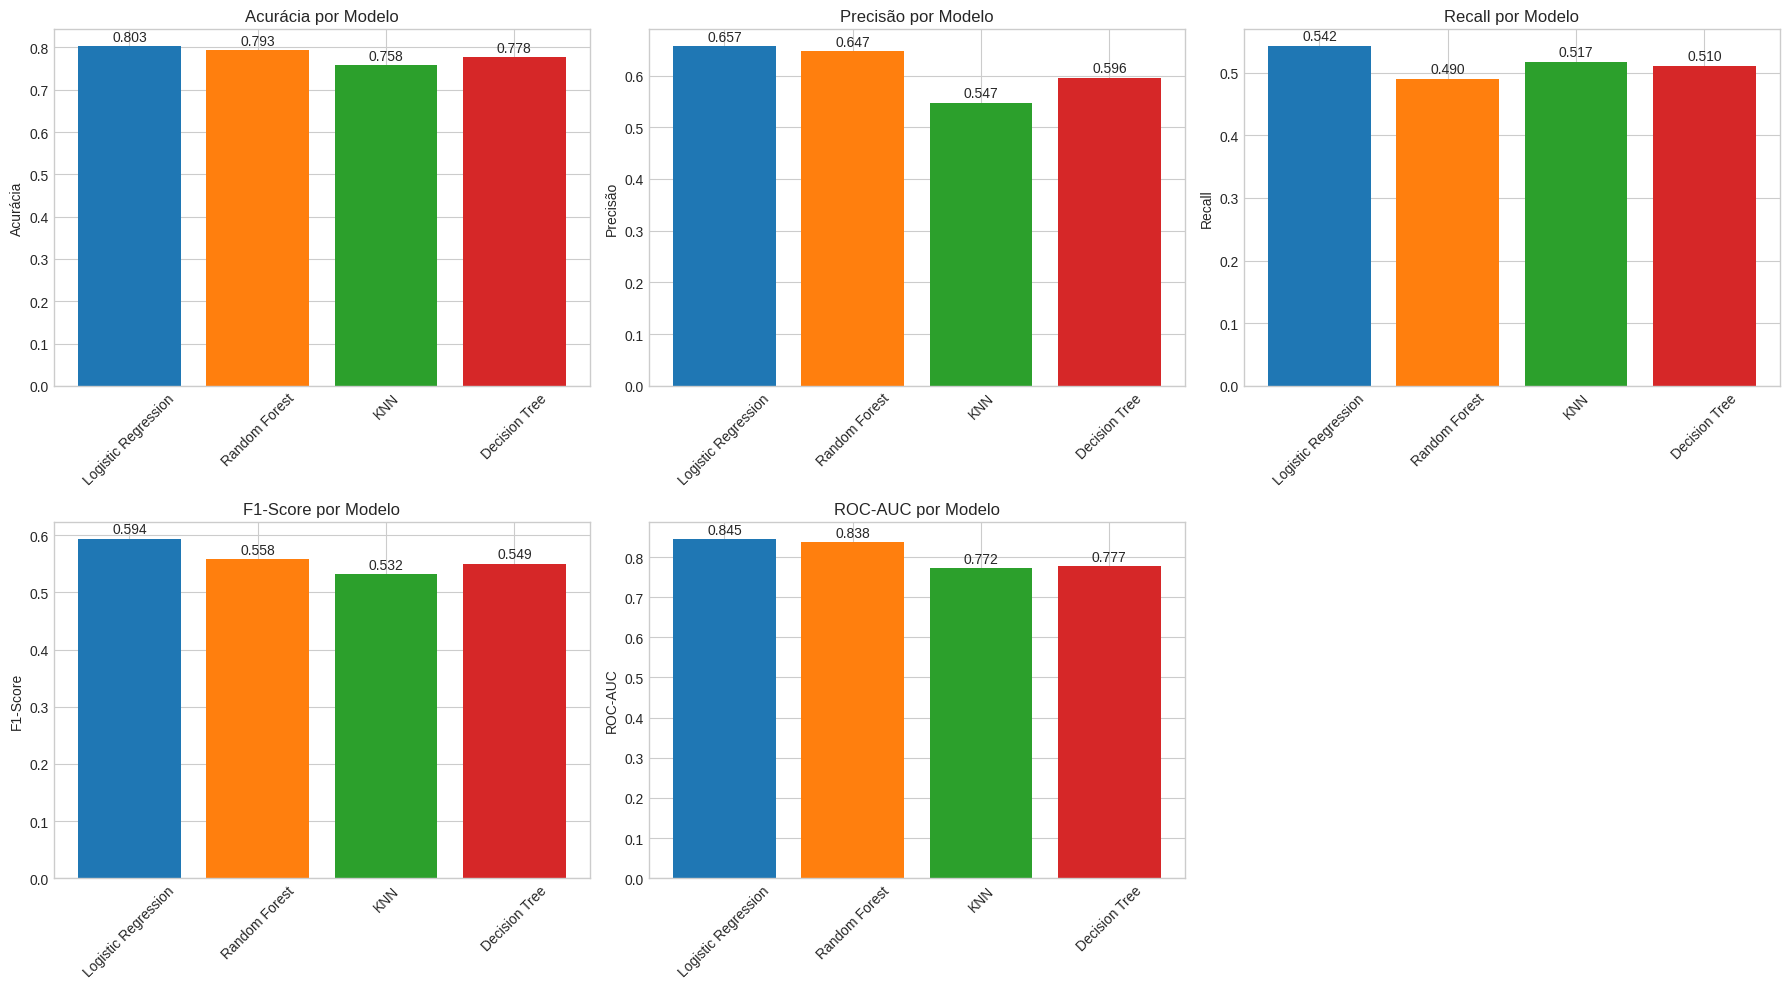

In [104]:
# ===============================================================================
# VISUALIZAÇÕES DE AVALIAÇÃO
# ===============================================================================

print("\n📈 Gerando visualizações de avaliação...")

# 1. Comparação de métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_to_plot = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics_to_plot):
    if i < 5:
        row, col = i // 3, i % 3
        ax = axes[row, col]
        bars = ax.bar(results_df['Modelo'], results_df[metric],
                     color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
        ax.set_title(f'{metric} por Modelo')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height:.3f}', ha='center', va='bottom')

# Remover subplot extra
axes[1, 2].remove()

plt.tight_layout()
plt.show()

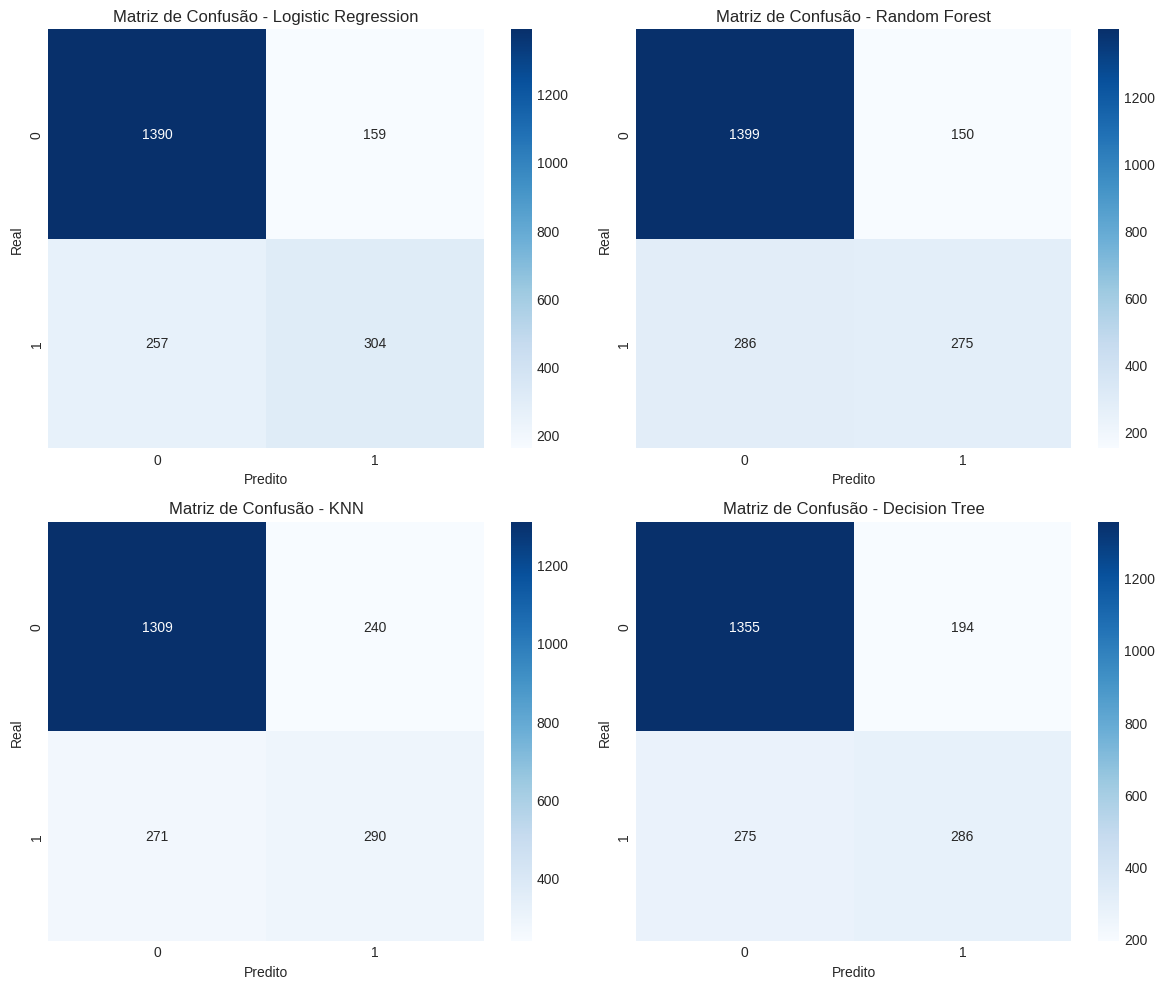

In [105]:
# 2. Matrizes de Confusão
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
model_names = list(models.keys())

for i, name in enumerate(model_names):
    ax = axes[i//2, i%2]
    cm = confusion_matrix(y_test, models[name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Matriz de Confusão - {name}')
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()

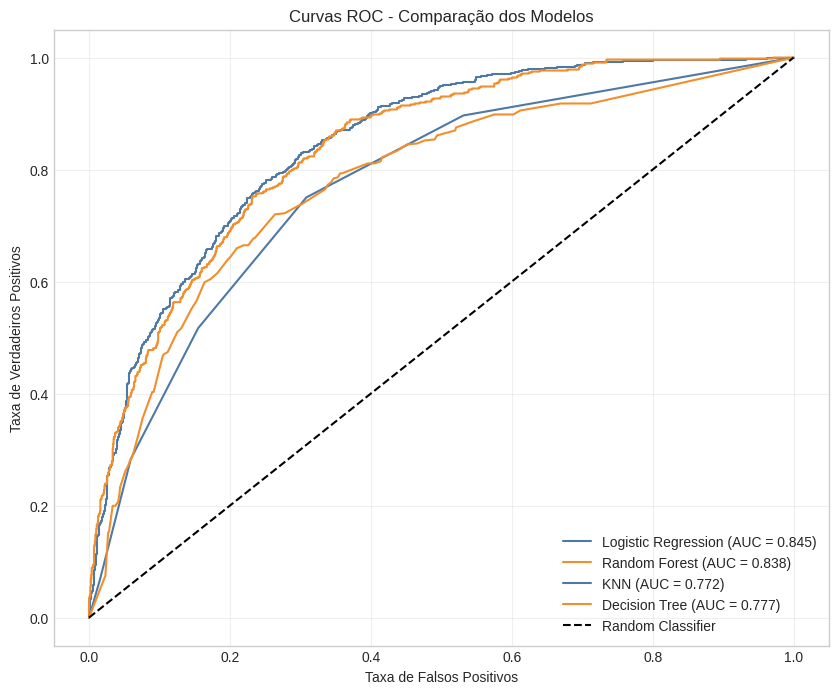

In [106]:
# 3. Curvas ROC
plt.figure(figsize=(10, 8))
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, models[name]['probabilities'])
    auc = models[name]['metrics']['ROC-AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação dos Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [107]:
# ===============================================================================
# ANÁLISE DE OVERFITTING/UNDERFITTING
# ===============================================================================

print("\n🔍 Analisando overfitting/underfitting...")

overfitting_analysis = []

for name, model_data in models.items():
    model = model_data['model']
    requires_scaling = model_data['requires_scaling']

    # Predição no conjunto de treino
    if requires_scaling:
        train_pred = model.predict(X_train_scaled)
    else:
        train_pred = model.predict(X_train)

    # Calcular métricas
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = model_data['metrics']['Acurácia']
    diff = train_acc - test_acc

    # Classificar status
    if diff > 0.1:
        status = "⚠️ Possível overfitting"
    elif diff > 0.05:
        status = "📊 Aceitável"
    else:
        status = "✅ Boa generalização"

    analysis = {
        'Modelo': name,
        'Acc_Treino': train_acc,
        'Acc_Teste': test_acc,
        'Diferença': diff,
        'Status': status
    }
    overfitting_analysis.append(analysis)

# Exibir análise
print("\n📊 Análise de Overfitting/Underfitting:")
for analysis in overfitting_analysis:
    print(f"\n{analysis['Modelo']}:")
    print(f"   Acurácia Treino: {analysis['Acc_Treino']:.3f}")
    print(f"   Acurácia Teste: {analysis['Acc_Teste']:.3f}")
    print(f"   Diferença: {analysis['Diferença']:.3f}")
    print(f"   Status: {analysis['Status']}")



🔍 Analisando overfitting/underfitting...

📊 Análise de Overfitting/Underfitting:

Logistic Regression:
   Acurácia Treino: 0.808
   Acurácia Teste: 0.803
   Diferença: 0.005
   Status: ✅ Boa generalização

Random Forest:
   Acurácia Treino: 0.883
   Acurácia Teste: 0.793
   Diferença: 0.090
   Status: 📊 Aceitável

KNN:
   Acurácia Treino: 0.832
   Acurácia Teste: 0.758
   Diferença: 0.074
   Status: 📊 Aceitável

Decision Tree:
   Acurácia Treino: 0.846
   Acurácia Teste: 0.778
   Diferença: 0.068
   Status: 📊 Aceitável



🎯 Analisando importância das variáveis...


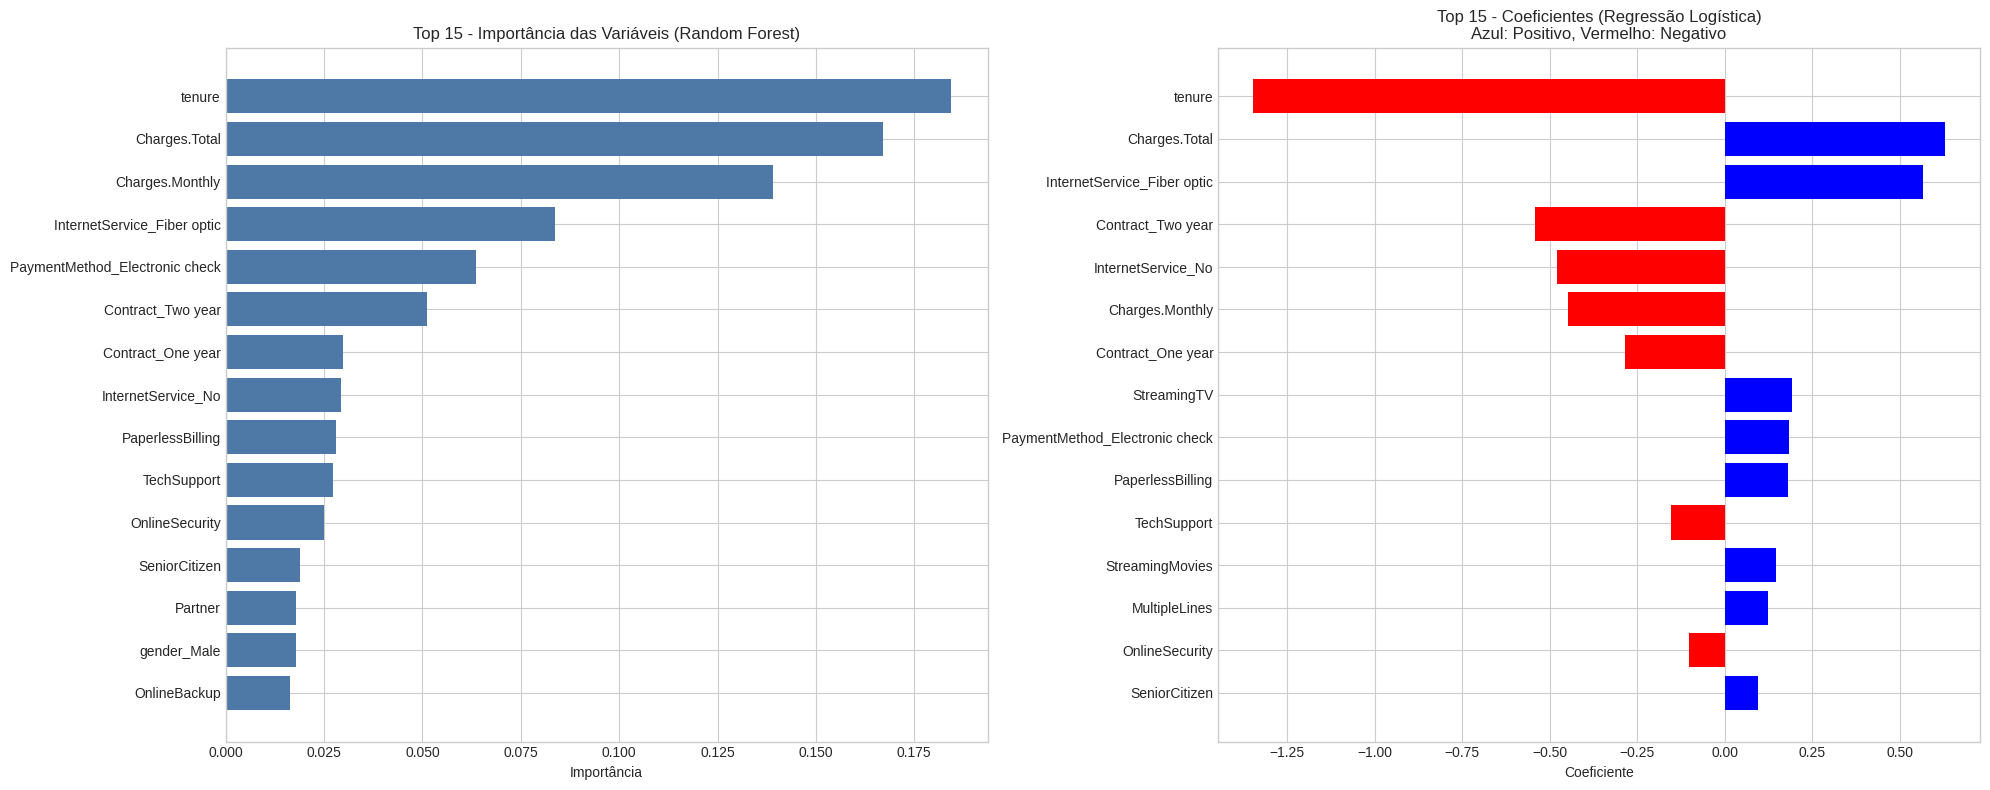


🏆 Top 10 Variáveis Mais Importantes (Random Forest):
   1. tenure: 0.1844
   2. Charges.Total: 0.1670
   3. Charges.Monthly: 0.1390
   4. InternetService_Fiber optic: 0.0838
   5. PaymentMethod_Electronic check: 0.0636
   6. Contract_Two year: 0.0510
   7. Contract_One year: 0.0299
   8. InternetService_No: 0.0293
   9. PaperlessBilling: 0.0280
   10. TechSupport: 0.0272

🏆 Top 10 Coeficientes Mais Relevantes (Regressão Logística):
   1. tenure: -1.3478 📉
   2. Charges.Total: 0.6306 📈
   3. InternetService_Fiber optic: 0.5673 📈
   4. Contract_Two year: -0.5432 📉
   5. InternetService_No: -0.4792 📉
   6. Charges.Monthly: -0.4461 📉
   7. Contract_One year: -0.2851 📉
   8. StreamingTV: 0.1915 📈
   9. PaymentMethod_Electronic check: 0.1845 📈
   10. PaperlessBilling: 0.1806 📈


In [112]:
# ===============================================================================
# INTERPRETAÇÃO E ANÁLISE DE VARIÁVEIS
# ===============================================================================

print("\n🎯 Analisando importância das variáveis...")

# Random Forest - Importância das variáveis
rf_model = models['Random Forest']['model']
feature_importance_rf = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

# Regressão Logística - Coeficientes
lr_model = models['Logistic Regression']['model']
feature_importance_lr = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lr_model.coef_[0]
}).sort_values('Coeficiente', key=abs, ascending=False)

# Visualizar importâncias
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Random Forest
top_15_rf = feature_importance_rf.head(15)
axes[0].barh(range(len(top_15_rf)), top_15_rf['Importância'])
axes[0].set_yticks(range(len(top_15_rf)))
axes[0].set_yticklabels(top_15_rf['Variável'])
axes[0].set_title('Top 15 - Importância das Variáveis (Random Forest)')
axes[0].set_xlabel('Importância')
axes[0].invert_yaxis()

# Regressão Logística
top_15_lr = feature_importance_lr.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_15_lr['Coeficiente']]
axes[1].barh(range(len(top_15_lr)), top_15_lr['Coeficiente'], color=colors)
axes[1].set_yticks(range(len(top_15_lr)))
axes[1].set_yticklabels(top_15_lr['Variável'])
axes[1].set_title('Top 15 - Coeficientes (Regressão Logística)\nAzul: Positivo, Vermelho: Negativo')
axes[1].set_xlabel('Coeficiente')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Exibir top variáveis
print(f"\n🏆 Top 10 Variáveis Mais Importantes (Random Forest):")
for i, (_, row) in enumerate(feature_importance_rf.head(10).iterrows(), 1):
    print(f"   {i}. {row['Variável']}: {row['Importância']:.4f}")

print(f"\n🏆 Top 10 Coeficientes Mais Relevantes (Regressão Logística):")
for i, (_, row) in enumerate(feature_importance_lr.head(10).iterrows(), 1):
    direction = "📈" if row['Coeficiente'] > 0 else "📉"
    print(f"   {i}. {row['Variável']}: {row['Coeficiente']:.4f} {direction}")


In [113]:
# ===============================================================================
# RELATÓRIO FINAL E CONCLUSÕES
# ===============================================================================

print("\n" + "="*80)
print("📋 RELATÓRIO FINAL - ANÁLISE DE CHURN COM MACHINE LEARNING")
print("="*80)

# Melhor modelo
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Modelo']
best_metrics = results_df.loc[results_df['F1-Score'].idxmax()]

print(f"\n🏆 MELHOR MODELO: {best_model_name}")
print(f"   • Acurácia: {best_metrics['Acurácia']:.3f} ({best_metrics['Acurácia']*100:.1f}%)")
print(f"   • Precisão: {best_metrics['Precisão']:.3f}")
print(f"   • Recall: {best_metrics['Recall']:.3f}")
print(f"   • F1-Score: {best_metrics['F1-Score']:.3f}")
print(f"   • ROC-AUC: {best_metrics['ROC-AUC']:.3f}")
print(f"   • Normalização: {'Sim' if models[best_model_name]['requires_scaling'] else 'Não'}")

print(f"\n📊 JUSTIFICATIVAS DOS MODELOS:")
for name, data in models.items():
    print(f"\n{name}:")
    print(f"   • {data['justification']}")
    print(f"   • Normalização necessária: {'Sim' if data['requires_scaling'] else 'Não'}")
    print(f"   • F1-Score: {data['metrics']['F1-Score']:.3f}")

print(f"\n🎯 PRINCIPAIS FATORES DE CHURN:")
print("Baseado na análise do Random Forest (modelo ensemble robusto):")
top_5_factors = feature_importance_rf.head(5)
for i, (_, row) in enumerate(top_5_factors.iterrows(), 1):
    print(f"   {i}. {row['Variável']}: {row['Importância']:.4f}")

print(f"\n💡 ESTRATÉGIAS DE RETENÇÃO RECOMENDADAS:")

# Analisar principais fatores para sugerir estratégias
important_vars = feature_importance_rf.head(10)['Variável'].tolist()

if any('Contract' in var for var in important_vars):
    print("   • 📑 CONTRATOS: Incentivar contratos de longo prazo com descontos progressivos")

if 'tenure' in important_vars:
    print("   • ⏰ FIDELIZAÇÃO: Programa de benefícios escalonados por tempo de permanência")

if any('Charges' in var for var in important_vars):
    print("   • 💰 PRICING: Revisar estratégia de preços e ofertar planos personalizados")

if any('Internet' in var for var in important_vars):
    print("   • 🌐 SERVIÇOS ONLINE: Melhorar qualidade e suporte dos serviços digitais")

if any('Payment' in var for var in important_vars):
    print("   • 💳 PAGAMENTOS: Facilitar métodos de pagamento e comunicação proativa")

if any('Support' in var or 'Security' in var for var in important_vars):
    print("   • 🛡️ SUPORTE: Investir em segurança online e suporte técnico proativo")

print(f"\n📈 PRÓXIMOS PASSOS RECOMENDADOS:")
print("   • Implementar o modelo em ambiente de produção para scoring em tempo real")
print("   • Desenvolver dashboard para monitoramento contínuo dos fatores de risco")
print("   • Criar campanhas de retenção direcionadas baseadas no score de churn")
print("   • Estabelecer processo de feedback para melhoria contínua do modelo")
print("   • Considerar coleta de dados adicionais (satisfação, NPS, interações)")

print(f"\n⚖️ CONSIDERAÇÕES TÉCNICAS:")
if churn_ratio < 0.4:
    print("   • Dataset apresenta desbalanceamento - considerar técnicas como SMOTE")
print("   • Validar modelo periodicamente devido à possível mudança nos padrões")
print("   • Considerar ensemble dos melhores modelos para maior robustez")
print("   • Implementar explicabilidade (SHAP/LIME) para decisões individuais")

print("\n" + "="*80)
print("✅ ANÁLISE COMPLETA DE MACHINE LEARNING FINALIZADA")
print("="*80)


📋 RELATÓRIO FINAL - ANÁLISE DE CHURN COM MACHINE LEARNING

🏆 MELHOR MODELO: Logistic Regression
   • Acurácia: 0.803 (80.3%)
   • Precisão: 0.657
   • Recall: 0.542
   • F1-Score: 0.594
   • ROC-AUC: 0.845
   • Normalização: Sim

📊 JUSTIFICATIVAS DOS MODELOS:

Logistic Regression:
   • Modelo linear que requer normalização. Oferece coeficientes interpretáveis.
   • Normalização necessária: Sim
   • F1-Score: 0.594

Random Forest:
   • Ensemble que lida bem com não-linearidades. Fornece importância das variáveis.
   • Normalização necessária: Não
   • F1-Score: 0.558

KNN:
   • Algoritmo baseado em distância, sensível à escala das variáveis.
   • Normalização necessária: Sim
   • F1-Score: 0.532

Decision Tree:
   • Modelo interpretável baseado em regras. Não sensível à escala dos dados.
   • Normalização necessária: Não
   • F1-Score: 0.549

🎯 PRINCIPAIS FATORES DE CHURN:
Baseado na análise do Random Forest (modelo ensemble robusto):
   1. tenure: 0.1844
   2. Charges.Total: 0.1670
  